# Linear Discriminant Analysis


## Basics

Linear Discriminant Analysis (LDA) is a supervised machine learning method used for classification. LDA is a technique for finding the linear combinations of features (variables) that best separate two or more classes in a dataset.

## Computation

We shall consider a standard iris data with 150 observations and fit LDA model to it. post that we shall compute the accuracy and transform into LDA space to visualise how well the LDA model segregated different species from our data. we start by importing necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split


# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris.target_names[iris.target]
iris_df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']
print("Total Number of Observations in the Iris Dataset:", len(iris_df.index))
print("Representing the Iris flower data in tabular format using first few rows as shown below:")
iris_df.head()


Total Number of Observations in the Iris Dataset: 150
Representing the Iris flower data in tabular format using first few rows as shown below:


,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa




From above table we could see that five features such as Sepal length, Petal width, Sepal width and Petal length are available that may help predict different species from iris data. We shall now fit LDA model to our iris data and evaluate it. We can see that the accuracy achieved is 98%.

In [ ]:
#Fitting LDA model to our iris data

X, y = iris_df[['s_length', 's_width', 'p_length', 'p_width']], iris_df['species']
model_LDA = LinearDiscriminantAnalysis().fit(X, y)

In [ ]:
# Evaluate model
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
accuracy_LDA = np.mean(cross_val_score(model_LDA, X, y, scoring='accuracy', cv=cross_validation, n_jobs=-1))
print("Accuracy of our LDA Model", accuracy_LDA)

Accuracy of our LDA Model 0.9800000000000001


## Illustration
From below plot we can see how clearly the three different species in our dataset are segregrated using LDA under LDA component 1 & 2.



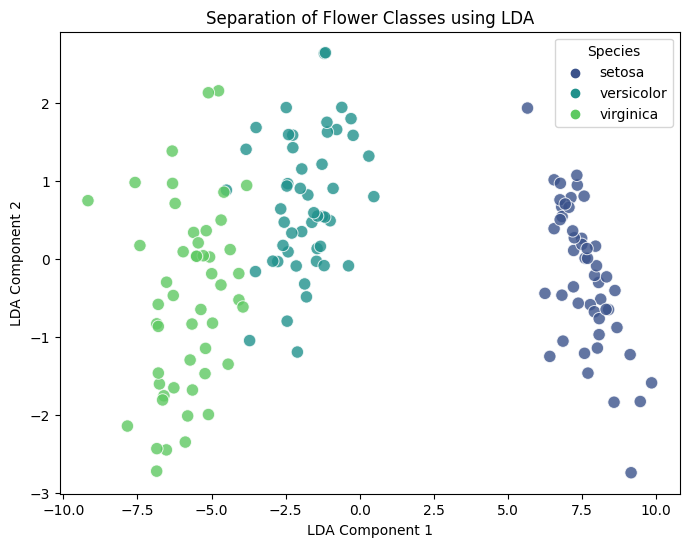

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transform our data into LDA space
X_LDA = model_LDA.transform(X)

# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_LDA[:, 0], y=X_LDA[:, 1], hue=y, palette='viridis', s=80, alpha=0.8)
plt.title('Separation of Flower Classes using LDA')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Species', loc='best')
plt.show()

## Advantages

Commonly known advantages are as below:-

- Its understanding and implementation is simpler.
- Highly effective with well seperated data.
- Can help for dimensonality reduction and hence help in improving performance of other models.


## Disadvantages

Commonly known disadvantages are as below:-

- If the assumptions of normality are not met, the LDA may not work well.
- Not good for handling non - linear relationships among the features.
- Not immune to outliers.

## Equations

Below are the applicable standard equations with respect to linear discriminant analysis technique.  The source [3] describes a basic reduction to one dimension.  The source [4] describes the computation in more detail.

### Within-Class Scatter Matrix

The within-class scatter matrix $\mathbf{S_W}$ quantifies the variance within each class and is defined as:

$$
\mathbf{S_W} = \sum_{i=1}^{c} \sum_{\mathbf{x} \in D_i} (\mathbf{x} - \boldsymbol{\mu_i})(\mathbf{x} - \boldsymbol{\mu_i})^T
$$

Where $c$ is the number of classes, $D_i$ is the set of samples belonging to class $i$, and $\boldsymbol{\mu_i}$ is the mean of class $i$.

### Between-Class Scatter Matrix

The between-class scatter matrix $\mathbf{S_B}$ quantifies the variance between the class means and is defined as:

$$
\mathbf{S_B} = \sum_{i=1}^{c} N_i (\boldsymbol{\mu_i} - \boldsymbol{\mu})(\boldsymbol{\mu_i} - \boldsymbol{\mu})^T
$$

Where $N_i$ is the number of samples in class $i$ and $\boldsymbol{\mu}$ is the global mean.

### Projection Matrix

LDA computes projection vectors $\mathbf{w}$ that maximize the ratio of the between-class variance to the within-class variance as:

$$
\mathbf{w}^* = \arg \max_{\mathbf{w}} \frac{\mathbf{w}^T\mathbf{S_B}\mathbf{w}}{\mathbf{w}^T\mathbf{S_W}\mathbf{w}}
$$

The projection matrix $\mathbf{W}$ contains the set of optimal projection vectors $\mathbf{w}^*$ as columns.

We choose the optimal projection by looking at the eigenvalues and eigenvectors of $S_W^{-1} S_B$.

After performing this projection we can choose a hyperplanes for decision boundaries on the projected data. In effect, we assume that each class has a Gaussian distribution with the same covariance matrix but different means.

## Features

- Very Simplistic and Interpretable.
- Computationally efficient.
- Useful in classification problems and also for dimensionality reduction.
- Able to deal with outlier and multicollinearity issue.



## Guide

### Inputs

-  $X$: The input data matrix where each row represents a sample and each column represents a feature/variable.
- $y$: The target vector containing class labels for each sample.
- Prior probabilities (optional): The prior probability for each class. If not provided, class probabilities are assumed to be uniform.

### Outputs

A linear discrimination model which consists of projection vectors that can be used to classify new data.

- Projection vectors: The projection vectors that maximize separation between the classes. Used to transform the data to the new subspace.
- Transformed data: The input data transformed onto the new subspace identified by LDA.
- Posterior probabilities: The posterior probability of a sample belonging to each class. Can be used for classification.
- Classification labels: The predicted class label for each sample based on highest posterior probability.


## Hyperparameters

Below are the hyperparameters that a LDA is generally known to exhibit:-

- priors: for mentioning priors for different classes in our dataset.
- n_components: This is number of components to use in the LDA model.
- solver: The solver is needed to fit the LDA model.'svd' solver is fast and accurate.'lsqr' solver is slow, but robust to outliers and good for large dataset.'eigen' is slowest, but more immune to outliers.

## Journal

The following journal article illustrates using LDA to predicting corporate bankruptcy:

Altman, Edward I. "Financial Ratios, Discriminant Analysis and the Prediction of Corporate Bankruptcy." Journal of Finance, vol. 23, no. 1, 1968, pp. 589-609.

In this research paper, LDA was used to predict corporate bankruptcy by developing a model using financial ratios as predictor variables. The model was able to accurately classify firms into bankrupt and non-bankrupt groups up to two years prior to bankruptcy.

## Keywords
linear discriminant analysis, LDA, supervised learning, classification,  discriminant function, hyperplane, covariance matrix, Bayes' theorem, posterior probability, predictive model

# Support Vector Machines


## Basics

SVMs are supervised ML technique with application to classification and regression problems. But, they are most commonly used in  the classification problems. It involves finding a hyperplane in N-dimensional space that best separates data points into two different classes. The hyperplane is chosen such that the support vectors have maximum margin in between. This helps us have a trade-off between bais and variance of the model.

## Computation and Illustration

We shall consider kaggle dataset of apple & orange. We shall now apply SVM to see how it classifies our data in consideration, into two distinct class. Let us see how the data looks in the tabular format.


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Getting Data
data_set = pd.read_csv("/content/apples_and_oranges.csv")
data_set.head(10)


,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


From above table we get an overview of two classes (apple and oranges) and two features (weight and size). Below we create a SVM classifier for above data, with 5-fold cross validation. for fold 1,2,4 & 5 we get the accuracy of 100% each and for fold 3 we get an accuracy of 87.5%. And overall mean accuracy of 97.5%.

In [ ]:

# Data:
X = data_set[['Weight', 'Size']].values
y = data_set['Class'].values

# Categorical class labels to numerical labels:
l_e = LabelEncoder()
yy_encode = l_e.fit_transform(y)

# GridSearchCV:
parameter_grid = {'C': [0.1, 1, 10, 100]}

classifier_initiate = SVC(kernel='rbf', random_state=1)

grid_search_initiate = GridSearchCV(classifier_initiate, parameter_grid, cv=5)
grid_search_initiate.fit(X, yy_encode)

CC_Best = grid_search_initiate.best_params_['C']

# Fit the SVM:
SVM_clf = SVC(kernel='rbf', random_state=1, C=CC_Best).fit(X, yy_encode)

# 5-fold cross-validation
Five_fold_scores = cross_val_score(SVM_clf, X, y, cv=5)

# Scores
print("Following are Cross-Validation Scores for each of the 5 folds:", Five_fold_scores)
print("Overall Mean Accuracy of the 5 folds:", np.mean(Five_fold_scores))

Following are Cross-Validation Scores for each of the 5 folds: [1.    1.    0.875 1.    1.   ]
Overall Mean Accuracy of the 5 folds: 0.975


## Illustration

We shall now visualise how SVM is seperating our data above in two seperate classes with a visual intuition as below. We can also see that we get C = 0.1 with GridSearch, which leads to a extremely small margin.

<ipython-input-3-fa735febd6e9>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[yy_encode == 0, 0], X[yy_encode == 0, 1], c='red', label='Apple', cmap='coolwarm', edgecolor='k')
<ipython-input-3-fa735febd6e9>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[yy_encode == 1, 0], X[yy_encode == 1, 1], c='green', label='Orange', cmap='coolwarm', edgecolor='k')


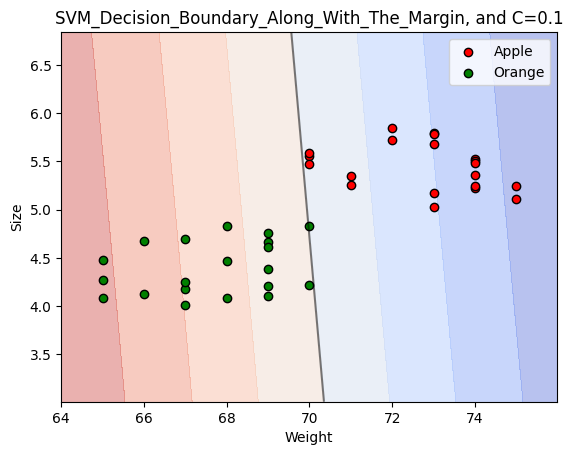

In [ ]:
# Creating meshgrid:
x_min_x, x_max_x = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min_y, y_max_y = X[:, 1].min() - 1, X[:, 1].max() + 1
xx_xx, yy_yy = np.meshgrid(np.arange(x_min_x, x_max_x, 0.01), np.arange(y_min_y, y_max_y, 0.01))
ZZZ = SVM_clf.decision_function(np.c_[xx_xx.ravel(), yy_yy.ravel()])
ZZZ = ZZZ.reshape(xx_xx.shape)

# Plotting decision boundary:
plt.contourf(xx_xx, yy_yy, ZZZ, alpha=0.4, cmap='coolwarm')

# Plot our data points:
plt.scatter(X[yy_encode == 0, 0], X[yy_encode == 0, 1], c='red', label='Apple', cmap='coolwarm', edgecolor='k')
plt.scatter(X[yy_encode == 1, 0], X[yy_encode == 1, 1], c='green', label='Orange', cmap='coolwarm', edgecolor='k')

# Plot margin:
plt.contour(xx_xx, yy_yy, ZZZ, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Label and Legends:
plt.title(f'SVM_Decision_Boundary_Along_With_The_Margin, and C={CC_Best}')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.legend()

# Show plot:
plt.show()


## Advantages

Commonly known advantages are as below:-

- High accuracy: It is highly accurate on a various classification and regression problems.
- Scalability: Easily scalable to handle large datasets.
- Robustness: Margin maximization objective makes it immune to noise and outliers.
- Interpretability: Easily interpretable, hence helpful for understanding how it works.
- Efficiency: Highly effecient working even with a high dimensional data and convergence to global minimum is gauranteed due to solving convex optimization problem.




## Disadvantages

Commonly known disadvantages are as below:-

- Kernel selection: We need to experiment a lot to get best kernel for our dataset. And this choice significantly impacts the final performance.

- Parameter sensitivity: Experimentation is needed to have optimal values of hyperparameters in place, as these tends to be sensitive.

- Lack of probabilistic interpretation of the decision boundary: This is a clear drawback when it is important to have probability of a data point belonging to particular class.


## Equations


### Linear SVM Classification

The sources [4] and [6] describe the following equations for SVM:

In linear SVM classification, we seek a hyperplane defined by $ \mathbf{w} \cdot \mathbf{x} + b = 0 $, where:
- $ \mathbf{w} $ is the weight vector.
- $ \mathbf{x} $ is the feature vector.
- $ b $ is the bias term.

The distance from a data point $ \mathbf{x}_i $ to the hyperplane is given by:
$$ \text{Distance} = \frac{| \mathbf{w} \cdot \mathbf{x}_i + b |}{\| \mathbf{w} \|} $$

The SVM optimization problem maximizes $ \| \mathbf{w} \| $ while ensuring correct classification:
$$ \min_{\mathbf{w}, b} \frac{1}{2} \| \mathbf{w} \|^2 \text{ subject to } y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1, \text{ for all data points } (\mathbf{x}_i, y_i) $$ Here $y_i$ is either $+1$ or $-1$ depending on what class we are in.

### Soft Margin SVM

For non-linearly separable data, a soft margin SVM allows misclassification using slack variables $ \xi_i $. The optimization problem becomes:
$$ \min_{\mathbf{w}, b, \xi} \frac{1}{2} \| \mathbf{w} \|^2 + C \sum_{i=1}^N \xi_i $$
$$ \text{subject to } y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 - \xi_i \text{ and } \xi_i \geq 0, \text{ for all data points } (\mathbf{x}_i, y_i) $$

### Kernel Trick

To handle non-linear data, SVMs use a kernel function $ K(\mathbf{x}_i, \mathbf{x}) $ to map features into a higher-dimensional space. The decision boundary becomes:
$$ \sum_{i=1}^N \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b = 0 $$

### Prediction

To classify a new data point $ \mathbf{x} $:
$$ \text{Predicted class} = \text{sign}\left(\sum_{i=1}^N \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b\right) $$

SVMs are versatile and effective in various machine learning applications, offering both linear and non-linear solutions for classification and regression tasks.

## Feature

- Able deal with high-dimensional data.
- Can be immune to noise and outliers.
- Able to handle non-linear relationships.
- Interpretable, scalable and flexible.


## Guide

### Inputs

- Training data: A set of labeled data points, where each data point has a set of features and a target variable.
- Hyperparameters: A set of parameters that control the behavior of the SVM, such as the regularization parameter and the kernel function.

### Outputs

- A trained SVM model: A model that can be used to classify or predict new data points.
- A decision boundary: A hyperplane that separates the data points into two classes.
- The support vectors, which are the data points that lie closest to the decision boundary.
- The margin, which is the distance between the support vectors

If we instead want to use a SVM for regression, we have input variables $X$, a target variable $y$, and we output a model $f(x) = w x + b$ such that $||f(x) - y||$ is always less than $\epsilon$, such that the norm of $w$ is minimized.

## Hyperparameters

Below are the hyperparameters that a SVM is generally known to exhibit:-

- Kernel function: It role is to map input data to higher-dimensional space where data will likely become linearly separable.
- C: Controls amount of misclassification on training data so as to have improved and generalize performance on newer data sets.
- Gamma: Controls the width of radial basis function (RBF) kernel.
- Degree of the polynomial kernel: Controls complexity of polynomial kernel function. Higher the value, complex will be the kernal function.
- Shrinking: Controls whether or not SVM uses shrinking heuristic for training speed up purpose.
- Tolerance: Controls convergence criterion of SVM training algo.


## Journal

The following journal article illustrates using SVM to stock price forecasting:

Huang, Wei, Yoshiteru Nakamori, and Shou-Yang Wang. "Forecasting stock market movement direction with support vector machine." _Computers & operations research_ 32.10 (2005): 2513-2522.

The article investigates using SVMs to predict the weekly movement direction of the Nikkei 225 stock index. The article compares SVM classification performance to other methods like linear discriminant analysis and neural networks. The SVM model outperformed the other techniques, demonstrating the strengths of SVMs for financial forecasting classification problems.


## Keywords

Support Vector Machine, SVM, Classification, Regression, Binary classification, Multiclass classification, Hyperplane, Margin, Support vectors, Kernel functions, supervised learning, machine learning

# Neural Networks


## Basics
Neural nets can be used for supervised learning (regression and classification problems) as well as for reinforcement learning or content generation. Neural networks interconnected nodes, or neurons, that process information and learn from data.  Each neuron has a bunch of inputs that are combined linearly using some weights, and then fed into a nonlinear activation function to produce an output.  The neurons are interconnected in layers so that the neural network takes some inputs and gets a final output.


## Computation

 We now generate a synthetic data and define a non- linear classification rule on it. We then use a simple feedforward neural network model to learn this relationship and accordingly classify our data points that lie inside or outside a circle with radius 1.

 The non-linear relationship being used is : f(x1, x2) = w1 * x1 + w2 * x2 + b, where w1, w2 and b are all constants.

 Below we can see our synthetic data with 1000 data points, consisting of 2 features. now as per this non - linear relationship y will be equal to 1 our data point lies inside the circle, and 0 if not.



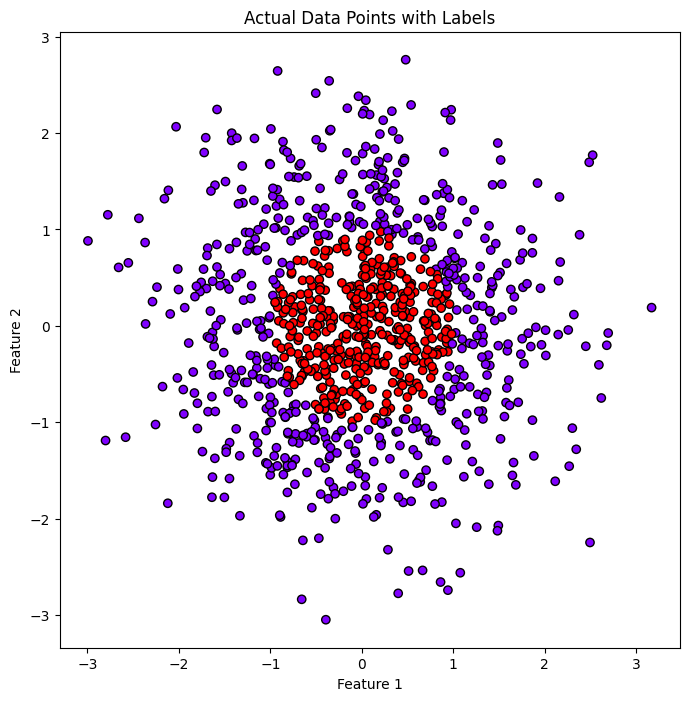

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.randn(1000, 2)
y = ((X[:, 0]**2 + X[:, 1]**2) < 1).astype(int)  # Nonlinear classification rule (inside a circle)

# Plot the actual data points with labels
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow, marker='o', edgecolors='k')
plt.title('Actual Data Points with Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

We obtain below test loss and accuracy scores, after training the model on test set.

Epoch 1/100
20/20 [==============================] - 2s 22ms/step - loss: 0.7310 - accuracy: 0.4297 - val_loss: 0.7019 - val_accuracy: 0.4875
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.7028 - accuracy: 0.3891 - val_loss: 0.6781 - val_accuracy: 0.4563
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.4297 - val_loss: 0.6579 - val_accuracy: 0.4750
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6680 - accuracy: 0.4984 - val_loss: 0.6440 - val_accuracy: 0.5625
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.5703 - val_loss: 0.6320 - val_accuracy: 0.6000
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.5906 - val_loss: 0.6210 - val_accuracy: 0.6000
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6356 - accuracy: 0.5922 - val_loss: 0.6120 - val_accuracy: 0.6000
Epoch 8/100


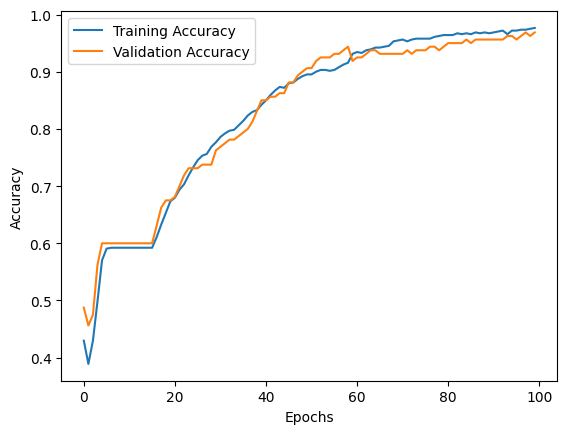

In [ ]:


# Split the data into training and testing sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

# Define a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(2,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



We now use this model to make prediction, that is classifying the data points which are within the circle and outside the circle, with the help of a decision boundary. This is visualized as below.

3829/3829 [==============================] - 5s 1ms/step


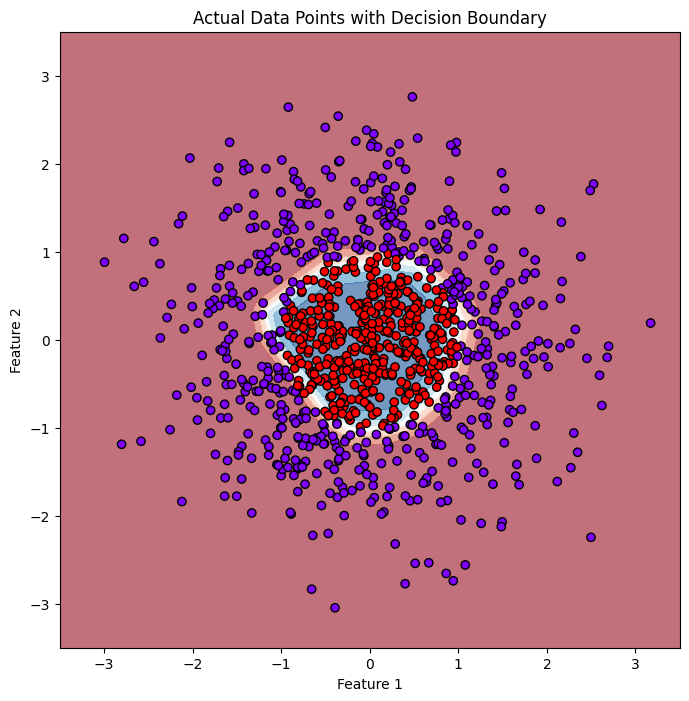

In [ ]:
# Create a mesh grid of points for the decision boundary
xx, yy = np.meshgrid(np.linspace(-3.5, 3.5, 350), np.linspace(-3.5, 3.5, 350))
grid = np.c_[xx.ravel(), yy.ravel()]

# Use the model to make predictions on the grid
probs = model.predict(grid).reshape(xx.shape)

# Plot the actual data points with labels
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, probs, cmap=plt.cm.RdBu, alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow, marker='o', edgecolors='k')
plt.title('Actual Data Points with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Advantages:
Commonly known advantages are as below:-

- Non-Linearity: Neural networks can model complex, non-linear relationships between input and output variables.

- Feature Learning: Neural networks can automatically learn relevant features from raw data, reducing the need for extensive feature engineering.

- Robust to outliers and noise: They can do well even if data has noise and outliers.

- Scalability: They can be scaled to a large datasets.

- Transfer Learning: Pretrained neural network models, such as those in computer vision (e.g., ImageNet pretraining) and natural language processing (e.g., BERT), can be fine-tuned on smaller, domain-specific datasets. [7]


## Disadvantages

Commonly known disadvantages are as below:-

- Black box: Neural networks are often described as "black boxes" because it can be difficult to understand how they make predictions.
- Data requirements: They generally require large amounts of data to get train effectively. This can be sometimes problematic where the data is scarce or expensive to collect.
- Overfitting: They are more susceptible to overfitting problem. However we can use approaches like data augmentation, regularization, etc to overcome this.
- Computational cost: Training neural networks can be computationally expensive, as they deal with large data and performs lot many iterations to get train.


## Equations

Neural networks are mathematical models used in machine learning and deep learning to approximate complex functions. Here are some fundamental equations and concepts that describe the mathematics of neural networks. You can read about it in Chapter 5 of [2].

1. **Neuron Activation (Single Neuron):**

   The output of a single neuron (or node) in a neural network can be described as follows:

   $$ a = \sigma(z) $$

   Where:
   - $a$ is the neuron's output.
   - $\sigma$ is the activation function (e.g., sigmoid, ReLU).
   - $z$ is the weighted sum of inputs and biases:

     $$ z = \sum_{i=1}^{n} (w_i \cdot x_i) + b $$

   Where:
   - $w_i$ is the weight associated with input $x_i$.
   - $x_i$ is the input.
   - $b$ is the bias term.

2. **Feedforward (Forward Pass):**

   In a neural network with multiple layers, the output of a layer is the input to the next layer. This can be represented mathematically for layer $l$ as:

   $$ a^{(l)} = \sigma(W^{(l)} \cdot a^{(l-1)} + b^{(l)}) $$

   Where:
   - $a^{(l)}$ is the output of layer $l$.
   - $\sigma$ is the activation function.
   - $W^{(l)}$ is the weight matrix for layer $l$.
   - $a^{(l-1)}$ is the output of the previous layer.
   - $b^{(l)}$ is the bias vector for layer $l$.

3. **Loss Function:**

   The loss function measures the error between the network's predictions and the actual target values. Common loss functions include mean squared error (MSE), cross-entropy, etc. For a single data point $i$, the loss ($L_i$) is calculated as:

   $$ L_i = \text{Loss}(y_i, \hat{y}_i) $$

   Where:
   - $y_i$ is the true target.
   - $\hat{y}_i$ is the predicted output of the neural network.

4. **Backpropagation:**

   Backpropagation is used to compute the gradients of the loss function with respect to the weights and biases, allowing for weight updates during training. The gradient of the loss with respect to the weights ($\nabla_{W^{(l)}} L$) can be computed using the chain rule:

   $$ \nabla_{W^{(l)}} L = \delta^{(l)} (a^{(l-1)})^T $$

   Where:
   - $\delta^{(l)}$ is the error (gradient) at layer $l$.
   - $(a^{(l-1)})^T$ is the transpose of the output of the previous layer.

5. **Gradient Descent:**

   Weight updates are performed using gradient descent or its variants. The update rule for a weight $w_{ij}^{(l)}$ in layer $l$ is typically given as:

   $$ w_{ij}^{(l)} = w_{ij}^{(l)} - \eta \cdot \frac{\partial L}{\partial w_{ij}^{(l)}} $$

   Where:
   - $\eta$ is the learning rate.

These equations represent the basic mathematical components of neural networks. In practice, neural networks can become much more complex with various architectures, optimization techniques, and regularization methods, but these equations provide a foundation for understanding their mathematical underpinnings. [7] [6, chapter 10]

## Features
- Robust to outliers: Neural networks can handle data with noisy or outlier values by learning complex patterns and representations.
- Handles nonlinear data: Neural networks are capable of modeling and capturing nonlinear relationships in data, making them suitable for a wide range of applications.
- Parallel processing: Neural networks can be easily parallelized, enabling efficient training on GPUs and TPUs for faster convergence.
- Feature learning: Neural networks automatically learn relevant features from the data, reducing the need for manual feature engineering.
- Scalability: Neural networks can scale to handle large datasets and complex tasks, making them suitable for tasks like image recognition and natural language processing.
- Adaptability: Neural networks can adapt and generalize well to new data, making them suitable for tasks with changing input distributions.
- Transfer learning: Pre-trained neural network models can be fine-tuned for specific tasks, saving time and resources in model development.
- Multimodal data: Neural networks can handle inputs with multiple data types (e.g., text, images, audio) and fuse information effectively.

## Guide
 ### Inputs

 - We first choose a neural net architecture along with applicable hyperparameters
 - We then used appropriately scaled input data for training this neural network.  

### Outputs
 - Once our neural network is trained it gives an output which is either the classification or the prediciton.

The output of the training process is the weights and biases for each neurons/nodes that enables the neural network a good predictor or classifier.

## Hyperparameters

Below are the hyperparameters that a Neural network model is generally known to exhibit:-

- Network architecture: Its defined by number of layers, and the number of neurons in each layer(for input, hidden and output layers), and also include type of connections between these layers.

- Activation function: Its a non-linear function, that helps the network to learn complex and non - linear relationships in our data.

- Weight Initialization: Appropriate weight initialization can help to prevent issues like vanishing or exploding gradients.

- Optimizer: Its an algorithm that updates the weights during training of the neural network.

- Learning rate: It decides how slow/fast the network is able to learn from the given training data.

- Batch size: Its the number of the training examples processed together in each iteration during the training process.

- Epochs: It specify the number of times the model passes through our entire training dataset.

- Loss Function: The choice this depends on our goal (classification, regression, etc.). Common loss functions are mean squared error (MSE), categorical cross-entropy, etc.

- Regularization parameters: These parameters/techniques help prevent our neural network from overfitting issue.

## Illustration

The neural network can be represented as below. It has several layers where each layer feeds forward into the next layer. Each neuron takes a weighted average of some inputs from the previous layer, and then applies a nonlinear activation function to it.

Image Source[10]

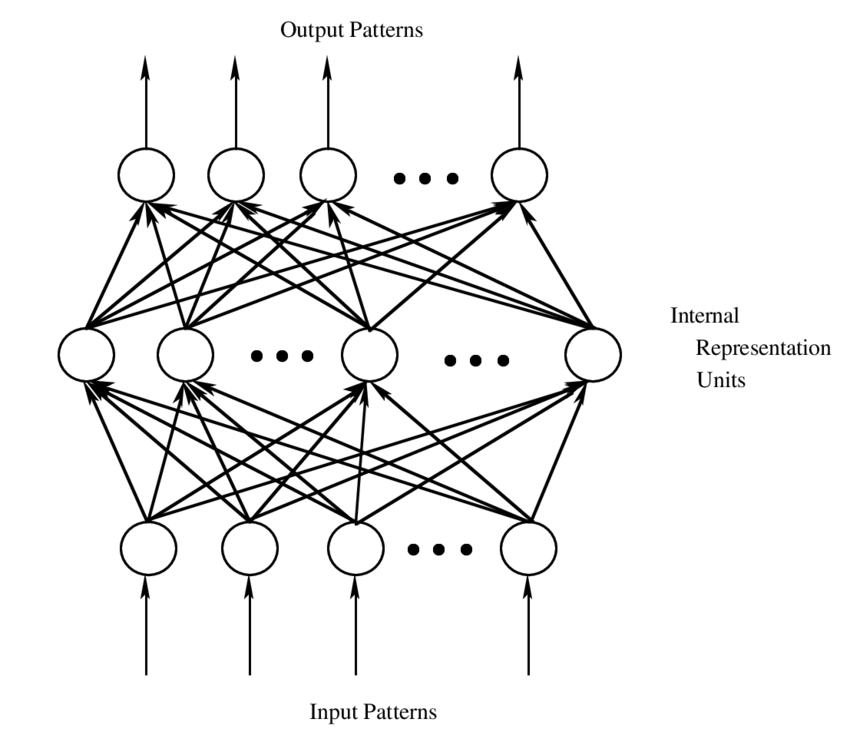

## Journal

Zhang, Guoqiang, et al. "Neural Network Models for Financial Time Series Forecasting: A Literature Review." IEEE Transactions on Neural Networks and Learning Systems, vol. 30, no. 4, 2019, pp. 1060-1081.

This study compares two types of deep learning models - LSTM and GRU - for predicting stock prices. The researchers tested the models using only stock market data, and then again using both stock data and financial news sentiment data.

They found that adding news sentiment data greatly improved the accuracy of both models in forecasting stock prices. The LSTM and GRU models performed equally well when using both stock and news data.

## Keywords

neural networks, machine learning, deep learning, artificial intelligence, artificial neural networks, supervised learning, unsupervised learning, reinforcement learning, activation function



**TECHNICAL SECTION:-**

**A. Linear Discriminant Analysis:**

Hyperparameters for LDA,can be choosen using grid search or a random search approach. Grid search approach aims to explore all possible combinations of hyperparameter values, whereas random search approach aims to explore hyperparameter values randomly.

The default hyperparameters values are:- priors=None, n_components=None, and solver='svd'.

For our iris dats set, these default values seems a good start because, all classes are equally distributed. Hence we can have priors set to 'None'.

Also we have only four features. Hence n_components parameter can be set to None.

Using 'svd' solver seems best as it is fast and more accurate for our small dataset.

**B. Support Vector Machine:**

The selection of appropriate choice for hyperparameters in SVM, can be achieved with approaches like grid search, random search and bayesian optimisation.The kernel function, C, and gamma are the most important hyperparameters to be determined.

In our example above initially it is not easy to decide if the data is linearly seperable or not. and also there could be noise and outlier in our dataset, and we have only 2 features, hence we choose rbf kernal.

Our implementation uses default gamma value  = 1/(2 * n_features) in sikit-learn, as we 2 features only and this seems a good start point.

We then use grid search to get an optimal C value of 0.1.

**C. Neural Network:**

In our example above we chose number hidden layers and neurons per hidden layer as 2 & 8 respectively to avoiding overfitting.

Also our selected activation function: relu enables our model to easily learn complex relationships.

The optimizer 'adam' helps adapt learning rate, thus helping to train the model more efficiently and avoid overfit and helps in better convergence.

The batch size of 32 and epochs of 100 seems as good start point for this simple classification problem.

**MARKETING ALPHA:-**




**A. Linear Discriminant Analysis (LDA):**

LDA is supervised machine learning method and has application for both classification and dimensionality reduction.

Key highlights:

**1. Powerful Classification:** It classify noisy and high-dimensional data points effectively into different classes.

**2. Dimensionality Reduction:** Helps reduce dimensionality of data while also preserving relevant information. Thus help improve performance of other models.

**3. Wide Applications:** LDA can be used for Fraud detection, customer segmentation, etc.




**B. Support Vector Machine (SVM):**

SVM is supervised machine learning method and has application for both classification and regression.

Key highlights:

**1. Accuracy:** SVM has great accuracy for both linear and non-linear data.

**2. Robustness to Outliers:** SVM being immune to outliers, makes it a nice choice for working on noisy data.

**3. Interpretability:** More interpretable than other types of ML models, such as deep neural networks, etc.

**C. Neural Network:-**

Neural networks models are somewhat similar in functioning like the human brain. They are capable of learning complex relationships and can be used in wide variety of tasks viz: classification, pattern recognition, regression, etc.

Key highlights:

**1. Accuracy:** exhibit high accuracy on various tasks viz: image recognition, natural language processing, etc.


**2. Versatility:** capable in solving wide variety of tasks viz: pattern recognition, classification, regression,etc.

**3. Scalability:** can work with larger datasets.


**LEARN MORE:-**

***1. Linear Discriminant Analysis***

Altman, Edward I. "Financial Ratios, Discriminant Analysis and the Prediction of Corporate Bankruptcy." Journal of Finance, vol. 23, no. 1, 1968, pp. 589-609.


- This research paper provide us insight into how LDA was used to predict corporate bankruptcy by developing a model using financial ratios as predictor variables. The model was able to accurately classify firms into bankrupt and non-bankrupt groups up to two years prior to bankruptcy.
- The paper demonstrated LDA's compatibility with ratio analysis to predict bankruptcy, suggesting traditional ratio analysis can have analytical rigor when utilized in a multivariate framework.
- Overall, the research highlights LDA's utility for classification problems where the dependent variable is qualitative, like bankrupt/non-bankrupt.

***2. Support Vector Machine***

Huang, Wei, Yoshiteru Nakamori, and Shou-Yang Wang. "Forecasting stock market movement direction with support vector machine." _Computers & operations research_ 32.10 (2005): 2513-2522.

- The article investigates using SVMs to predict the weekly movement direction of the Nikkei 225 stock index.
- The article compares SVM classification performance to other methods like linear discriminant analysis and neural networks. The SVM model outperformed the other techniques, demonstrating the strengths of SVMs for financial forecasting classification problems.



***3. Neural Networks***

Zhang, Guoqiang, et al. "Neural Network Models for Financial Time Series Forecasting: A Literature Review." IEEE Transactions on Neural Networks and Learning Systems, vol. 30, no. 4, 2019, pp. 1060-1081.

- This study compares two types of deep learning models - LSTM and GRU - for predicting stock prices. The researchers tested the models using only stock market data, and then again using both stock data and financial news sentiment data.

- They found that adding news sentiment data greatly improved the accuracy of both models in forecasting stock prices. The LSTM and GRU models performed equally well when using both stock and news data.

- The researchers proposed a system that uses both LSTM and GRU models together. The system automatically chooses whichever model is making the most accurate predictions at any given time. This approach combines the strengths of both models. It also allows the system to dynamically adapt to changing market conditions.

- This study demonstrates that deep learning models can be highly effective at stock market forecasting, especially when combining stock data and news sentiment data. The proposed system with both LSTM and GRU models is promising for building automated and accurate stock prediction tools.

**COMPARING MODELS:-**

We provide a short summary of our models we worked with in GWP 1 & GWP 2, as below:

In [ ]:
import numpy as np
import pandas as pd

# Creating DataFrame
df = pd.DataFrame({'Feature': ['Effectiveness for higher dimensional spaces', 'Immunity to outliers and noise', 'Ability to handle non-linear relationships', 'Sparsity', 'Interpretability', 'Scalability', 'Flexibility'],
                   'SVM': ['High', 'High', 'Yes', 'Yes', 'Medium', 'High', 'High'],
                   'LDA': ['Medium', 'Medium', 'No', 'No', 'High', 'Medium', 'Medium'],
                   'Neural networks': ['High', 'Varies', 'Yes', 'Varies', 'Low', 'High', 'High'],
                   'LASSO regression': ['High', 'Medium', 'No', 'High', 'High', 'Medium', 'Low'],
                  'PCA' : ['High', 'High', 'No', 'Yes', 'Medium', 'High', 'High'],
                  'K-means' : ['Low', 'Low', 'No', 'No', 'High', 'Medium', 'Low']
                   })

# Display the DataFrame
df

,Feature,SVM,LDA,Neural networks,LASSO regression,PCA,K-means
0,Effectiveness for higher dimensional spaces,High,Medium,High,High,High,Low
1,Immunity to outliers and noise,High,Medium,Varies,Medium,High,Low
2,Ability to handle non-linear relationships,Yes,No,Yes,No,No,No
3,Sparsity,Yes,No,Varies,High,Yes,No
4,Interpretability,Medium,High,Low,High,Medium,High
5,Scalability,High,Medium,High,Medium,High,Medium
6,Flexibility,High,Medium,High,Low,High,Low


# Bibliography

1. Altman, Edward I. "Financial Ratios, Discriminant Analysis and the Prediction of Corporate Bankruptcy." _Journal of Finance_, vol. 23, no. 1, 1968, pp. 589-609.

2. Bishop, Christopher M. _Pattern Recognition and Machine Learning_. New York: Springer-Verlag, 2006.

3. Fisher, R. A. (1936). "The Use of Multiple Measurements in Taxonomic Problems." _Annals of Eugenics_, 7(2), 179-188.


4. Hastie, T., Tibshirani, R., & Friedman, J. (2009). _The Elements of Statistical Learning: Data Mining, Inference, and Prediction_
(2nd ed.). Springer.

5. Huang, Wei, Yoshiteru Nakamori, and Shou-Yang Wang. "Forecasting stock market movement direction with support vector machine." _Computers & operations research_ 32.10 (2005): 2513-2522.

6. James, Gareth, et al. _An Introduction to Statistical Learning: With Applications in Python_. 2nd ed., Springer, 2021.

7. Nielsen, Michael. "Neural Networks and Deep Learning." _Neural Networks and Deep Learning_, http://neuralnetworksanddeeplearning.com/index.html. Accessed 28 Sept. 2023.

8. Radhika. "The Mathematics Behind Support Vector Machine Algorithm (SVM)." *Analytic Vidhya*, 23 Oct. 2020. https://www.analyticsvidhya.com/blog/2020/10/the-mathematics-behind-svm/

9. Zhang, Guoqiang, et al. "Neural Network Models for Financial Time Series Forecasting: A Literature Review." _IEEE Transactions on Neural Networks and Learning Systems_, vol. 30, no. 4, 2019, pp. 1060-1081.

10. Artficial neural network architecture. the circles represent the ... (n.d.). https://www.researchgate.net/figure/Artficial-neural-network-architecture-The-circles-represent-the-nodes-of-the-network-and_fig1_245575394